# Problem 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1.2, 3.2, 5.1, 3.5, 2.6]).reshape((-1, 1))
y = np.array([7.8, 1.2, 6.4, 2.6, 8.1]).reshape((-1, 1))

In [3]:
def normal_equation(x, y, lmd=0):
    n, d = x.shape[0], x.shape[1]
    ones = np.ones(n).reshape(-1, 1)
    x = np.hstack((ones, x))
    return np.linalg.inv(x.T @ x + (lmd**2) * np.eye(d + 1)) @ x.T @ y

In [4]:
lmd = [0, 1, 10]
theta = []
print("2a)")
for i, l in enumerate(lmd):
    theta.append(normal_equation(x, y, l))
    print(f"Equation for lambda = {l} is y = {theta[i][1][0]} * x + {theta[i][0][0]}")

2a)
Equation for lambda = 0 is y = -0.6766317887394105 * x + 7.331091180866961
Equation for lambda = 1 is y = 0.47491248541423553 * x + 3.1152275379229852
Equation for lambda = 10 is y = 0.4671668474177275 * x + 0.1791637826693662


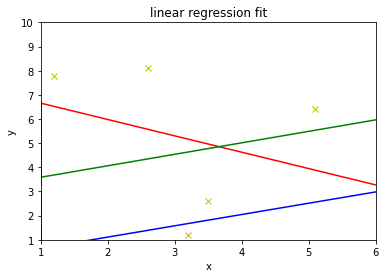

In [5]:
x1 = np.linspace(1, 6, 100).reshape((-1, 1))
n, d = x1.shape[0], x1.shape[1]
ones = np.ones(n).reshape(-1, 1)
x1 = np.hstack((ones, x1))
y1 = x1 @ theta[0]

x2 = np.linspace(1, 6, 100).reshape((-1, 1))
n, d = x2.shape[0], x2.shape[1]
ones = np.ones(n).reshape(-1, 1)
x2 = np.hstack((ones, x2))
y2 = x2 @ theta[1]

x3 = np.linspace(1, 6, 100).reshape((-1, 1))
n, d = x3.shape[0], x3.shape[1]
ones = np.ones(n).reshape(-1, 1)
x3 = np.hstack((ones, x3))
y3 = x3 @ theta[2]


plt.plot(x1, y1, '-r')
plt.plot(x2, y2, '-g')
plt.plot(x3, y3, '-b')
plt.plot(x, y, 'yx')
plt.axis([1, 6, 1, 10])
plt.xlabel('x')
plt.ylabel('y')
plt.title('linear regression fit')
plt.show()

## 2b

From the above plots, it is clear that when $\lambda = 0$ (or no regularization), it is overfitting the outliers (<b>Red line</b>). When $\lambda = 1$, it is just fitting the data (<b>Green line</b>) and not sensitive to outliers. When $\lambda = 10$, there is too much of regularization. Hence, it is underfitting the data (<b>Blue line</b>). 

# Problem 4

In [6]:
def get_gradient(beta, g, x, y):
    del_g = np.array([x * np.cos(beta[1][0] * x), -x * np.sin(beta[2][0] * x)]).reshape((10, 2))
    n = x.shape[0]
    del_g = np.hstack((del_g, np.ones(n).reshape(-1, 1)))
    return np.sum(2 * (g(beta, x) - y) * del_g, axis=0).reshape((-1, 1))

In [7]:
def g(beta, x):
    return beta[0][0] + np.sin(beta[1][0] * x) + np.cos(beta[2][0] * x)

In [8]:
def RSS(beta, g, x, y):
    return np.sum((g(beta, x) - y)**2)

In [9]:
def gradient_descent(g, x, y, lr=0.01, iterations=100, threshold=0.001):
    beta = np.array([np.random.rand(), np.random.rand(), np.random.rand()]).reshape((-1, 1))
    beta_prev = beta
    
    losses = []
    for i in range(iterations):
        gradient = get_gradient(beta_prev, g, x, y)
        beta = beta_prev - lr * gradient
        if np.all(np.abs(beta - beta_prev) < threshold):
            print(f"Convergence found at iteration {i}.")
            break
        beta_prev = beta
        losses.append(RSS(beta, g, x, y))
    
    return losses, beta

In [10]:
x = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
y = np.array([2.85, 1.5, 0.49, 1.57, 1.9, 0.6, 0.38, 2.33, 1.65, 0.3])
x = x.reshape((-1, 1))
y = y.reshape((-1, 1))

In [11]:
losses, beta = gradient_descent(g, x, y, lr=0.0001, iterations=50, threshold=0.00001)

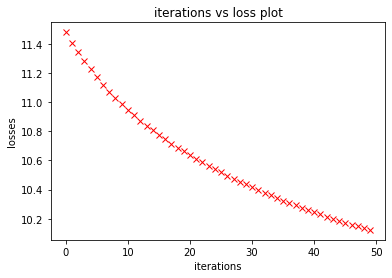

In [12]:
plt.plot(losses, 'rx')
plt.xlabel('iterations')
plt.ylabel('losses')
plt.title('iterations vs loss plot')
plt.show()